In [1]:
%matplotlib inline
import numpy as np
import torch
from d2l import torch as d2l

def f(x):
    return x ** 2

def f_grad(x):
    return 2 * x

In [2]:
def gd(eta, f_grad):
    """ 返回梯度下降迭代的中间结果 """
    x = 10.
    results = [x]
    for i in range(10):
        print(f"{x:.2f} -= {eta} * {f_grad(x)}")
        x -= eta * f_grad(x)
        print(f"x = {x:.4f}")
        results.append(x)
    print(f"epoch 10, x: {x:f}")
    return results

results = gd(.2, f_grad)

10.00 -= 0.2 * 20.0
x = 6.0000
6.00 -= 0.2 * 12.0
x = 3.6000
3.60 -= 0.2 * 7.199999999999999
x = 2.1600
2.16 -= 0.2 * 4.319999999999999
x = 1.2960
1.30 -= 0.2 * 2.5919999999999996
x = 0.7776
0.78 -= 0.2 * 1.5551999999999997
x = 0.4666
0.47 -= 0.2 * 0.9331199999999997
x = 0.2799
0.28 -= 0.2 * 0.5598719999999998
x = 0.1680
0.17 -= 0.2 * 0.33592319999999987
x = 0.1008
0.10 -= 0.2 * 0.20155391999999991
x = 0.0605
epoch 10, x: 0.060466


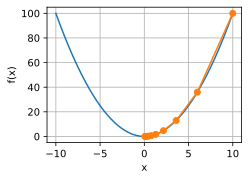

In [3]:
def show_trace(results, f):
    n = max(abs(min(results)), abs(max(results)))   # 应该是为了描数轴用
    f_line = torch.arange(-n, n, .01)
    d2l.set_figsize()
    # plot()的x和y参数依次对应即可
    d2l.plot([f_line, results], [[f(x) for x in f_line], [f(x) for x in results]], 'x', 'f(x)', fmts=['-', '-o'])

show_trace(results, f)

10.00 -= 0.05 * 20.0
x = 9.0000
9.00 -= 0.05 * 18.0
x = 8.1000
8.10 -= 0.05 * 16.2
x = 7.2900
7.29 -= 0.05 * 14.579999999999998
x = 6.5610
6.56 -= 0.05 * 13.121999999999998
x = 5.9049
5.90 -= 0.05 * 11.8098
x = 5.3144
5.31 -= 0.05 * 10.62882
x = 4.7830
4.78 -= 0.05 * 9.565938
x = 4.3047
4.30 -= 0.05 * 8.609344199999999
x = 3.8742
3.87 -= 0.05 * 7.748409779999999
x = 3.4868
epoch 10, x: 3.486784


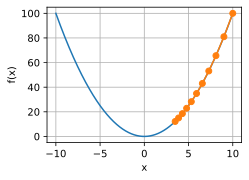

In [4]:
show_trace(gd(.05, f_grad), f)

10.00 -= 1.1 * 20.0
x = -12.0000
-12.00 -= 1.1 * -24.0
x = 14.4000
14.40 -= 1.1 * 28.800000000000004
x = -17.2800
-17.28 -= 1.1 * -34.56000000000001
x = 20.7360
20.74 -= 1.1 * 41.472000000000016
x = -24.8832
-24.88 -= 1.1 * -49.766400000000026
x = 29.8598
29.86 -= 1.1 * 59.71968000000005
x = -35.8318
-35.83 -= 1.1 * -71.66361600000008
x = 42.9982
43.00 -= 1.1 * 85.99633920000011
x = -51.5978
-51.60 -= 1.1 * -103.19560704000014
x = 61.9174
epoch 10, x: 61.917364


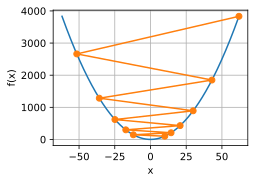

In [5]:
show_trace(gd(1.1, f_grad), f)

10.00 -= 2 * 4.71238899230957
x = 0.5752
0.58 -= 2 * 0.89090496301651
x = -1.2066
-1.21 -= 2 * 0.5365050435066223
x = -2.2796
-2.28 -= 2 * -0.4680910110473633
x = -1.3434
-1.34 -= 2 * 0.4316767156124115
x = -2.2068
-2.21 -= 2 * -0.3904902935028076
x = -1.4258
-1.43 -= 2 * 0.36442264914512634
x = -2.1546
-2.15 -= 2 * -0.33537930250167847
x = -1.4839
-1.48 -= 2 * 0.3152390420436859
x = -2.1144
-2.11 -= 2 * -0.2930939197540283
x = -1.5282
epoch 10, x: -1.528166


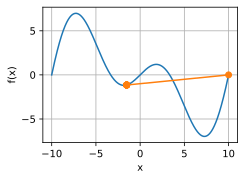

In [6]:
c = torch.tensor(.15 * np.pi)

def f(x):
    return x * torch.cos(c * x)

def f_grad(x):
    return torch.cos(c * x) - c * x * torch.sin(c * x)

show_trace(gd(2, f_grad), f)

In [9]:
def train_2d(trainer, steps=20, f_grad=None):
    """ 返回x1 x2所有迭代过程的结果; 这可能是上文说的那个update函数 """
    x1, x2, s1, s2 = -5, -2, 0, 0   # s1 s2是什么？？？
    results = [(x1, x2)]
    for i in range(steps):
        if f_grad:
            x1, x2, s1, s2 = trainer(x1, x2, s1, s2, f_grad)
        else:
            x1, x2, s1, s2 = trainer(x1, x2, s1, s2)
        results.append((x1, x2))
    print(f"epoch {i + 1}, x1:{float(x1):f}, x2:{float(x2):f}")
    return results

def show_trace_2d(f, results):
    """ 显示轨迹 """
    d2l.set_figsize()
    d2l.plt.plot(*zip(*results), '-o', color='#ff7f0e')
    x1, x2 = torch.meshgrid(torch.arange(-5.5, 1., .1), torch.arange(-3., 1., .1))
    d2l.plt.contour(x1, x2, f(x1, x2), colors='#1f77b4')
    d2l.plt.xlabel('x1')
    d2l.plt.ylabel('x2')

epoch 20, x1:-0.057646, x2:-0.000073


d:\Anaconda3\envs\d2l\lib\site-packages\torch\functional.py:445: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ..\aten\src\ATen\native\TensorShape.cpp:2157.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


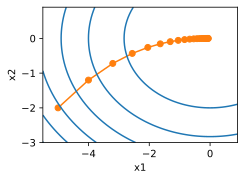

In [10]:
def f_2d(x1, x2):
    return x1 ** 2 + 2 * x2 ** 2

def f_2d_grad(x1, x2):
    return (2 * x1, 4 * x2)

def gd_2d(x1, x2, s1, s2, f_grad):
    g1, g2 = f_grad(x1, x2)
    return (x1 - eta * g1, x2 - eta * g2, 0, 0)

eta = .1
show_trace_2d(f_2d, train_2d(gd_2d, f_grad=f_2d_grad))

epoch 10, x: tensor(0.)


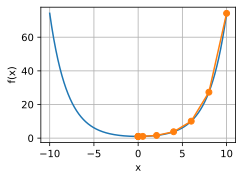

In [11]:
c = torch.tensor(.5)

def f(x):
    return torch.cosh(c * x)

def f_grad(x):
    return c * torch.sinh(c * x)

def f_hess(x):
    return c ** 2 * torch.cosh(c * x)

def newton(eta=1):
    x = 10.
    results = [x]
    for i in range(10):
        x -= eta * f_grad(x) / f_hess(x)
        results.append(float(x))
    print('epoch 10, x:', x)
    return results

show_trace(newton(), f)

epoch 10, x: tensor(7.2699)


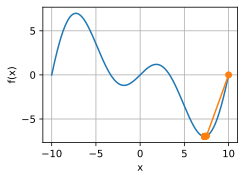

In [14]:
c = torch.tensor(0.15 * np.pi)

def f(x):  # 目标函数
    return x * torch.cos(c * x)

def f_grad(x):  # 目标函数的梯度
    return torch.cos(c * x) - c * x * torch.sin(c * x)

def f_hess(x):  # 目标函数的Hessian
    return - 2 * c * torch.sin(c * x) - x * c**2 * torch.cos(c * x)

show_trace(newton(eta=.5), f)